# 1. Backtesting Data 


In [52]:
# Get the new training and testing sets
import pandas as pd
import talib as ta
# Training data for XGBoost model 
import warnings
import numpy as np
import vectorbt as vbt
warnings.filterwarnings("ignore")  # Suppress all warnings
import matplotlib.pyplot as plt
df_vnindex = pd.read_csv('Dataset/Backtesting_Data.csv')
df_vnindex['Date'] = pd.to_datetime(df_vnindex['Date'])
data_retrain = df_vnindex[df_vnindex['Date']>='2020-01-01' ]
data_retrain = df_vnindex[df_vnindex['Date']<='2023-06-01' ]
## Backtesting Data
# df_vnindex = pd.read_csv('Dataset/Backtesting_Data.csv')
df_vnindex['Date'] = pd.to_datetime(df_vnindex['Date'])
backtesting_data = df_vnindex[(df_vnindex['Date']>='2023-06-01')& (df_vnindex['Date']<='2024-01-01')]


In [54]:
# Import necessary libraries
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import talib as ta
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings
# Import Dataset 
data = pd.read_csv('Dataset/DNSE_Dataset_OHLC_daily.csv')
data['Date'] = pd.to_datetime(data['Date'])
import matplotlib.patches as mpatches
# Process Data Date
data = data[data['Date']>='2023-06-01']
data = data[data['Date']<='2024-01-01']

# data_HPG = data[data['Symbol']=='BID']
# # Exclude all symbols that are not trading daily and symbols that are not trading stocks
# data = data[data['Symbol'].str.len() <= 5]
# data = data[~data['Symbol'].isin(data[data['Volume'] == 0]['Symbol'].unique())]

# 2 . Load  the Model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import joblib

#load saved model
model = joblib.load('exported_model.xgb')

# 3.Inference on Backtesting Data 

In [56]:
columns_to_keep = [col for col in data_retrain.columns if col != 'Label' and col != 'Date' and col != 'Symbol']
backtesting_data_1 = backtesting_data[columns_to_keep]
backtesting_data['Regime']= model.predict(backtesting_data_1)

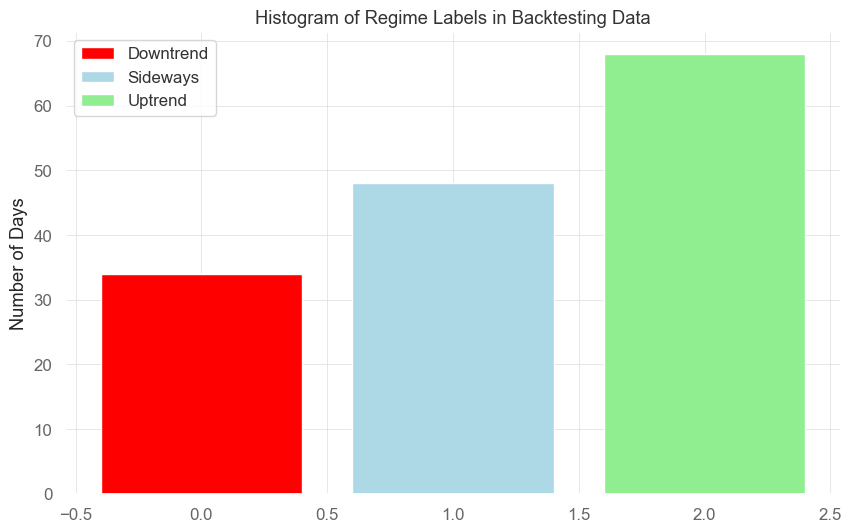

In [57]:
# Plot histogram of labels which title number of day in each trend which number of day in each trend onto of the bar
plt.figure(figsize=(10, 6))
backtesting_data['Regime'].hist()
plt.title('Histogram of Regime Labels in Backtesting Data')
plt.ylabel('Number of Days')
# add color to each bar
plt.bar([0, 1, 2], backtesting_data['Regime'].value_counts().sort_index(), color=['red', 'lightblue', 'lightgreen'],label = ['Downtrend', 'Sideways', 'Uptrend'])
# plt.xticks([0, 1, 2], ['Downtrend', 'Sideways', 'Uptrend'])
plt.legend()
plt.show()


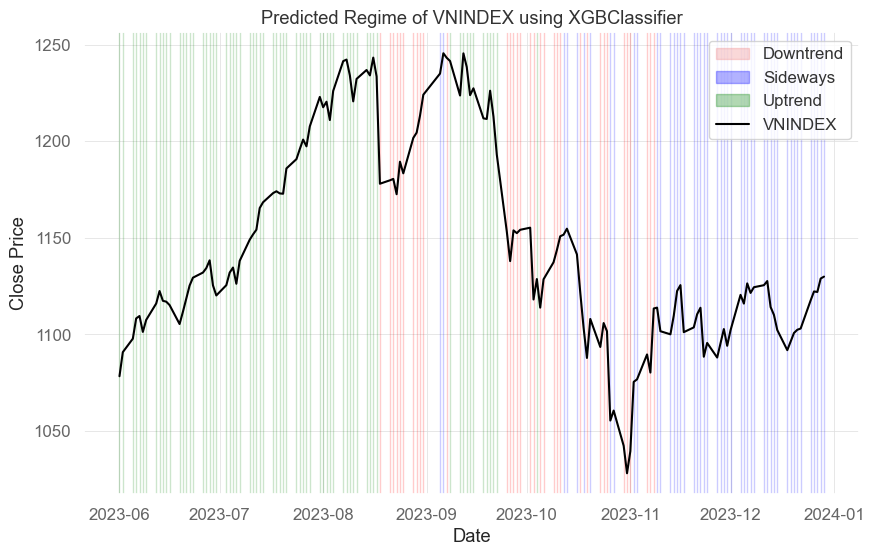

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Plotting backtesting_data['Close']
plt.figure(figsize=(10, 6))
plt.plot(backtesting_data['Date'], backtesting_data['Close'], label='VN Index Close', color='black')

# Assuming backtesting_data.index is a DateTimeIndex or similar; if not, convert it accordingly.
# Step 2: Highlighting areas using axvspan
# For red_data.index
for start, end in zip(backtesting_data[backtesting_data['Regime'] == 0]['Date'], backtesting_data[backtesting_data['Regime'] == 0]['Date']):
    plt.axvspan(start, end, color='red', alpha=0.2)

# For blue_data.index
for start, end in zip(backtesting_data[backtesting_data['Regime'] == 1]['Date'], backtesting_data[backtesting_data['Regime'] == 1]['Date']):
    plt.axvspan(start, end, color='blue', alpha=0.2)

# For green_data.index
for start, end in zip(backtesting_data[backtesting_data['Regime'] == 2]['Date'],backtesting_data[backtesting_data['Regime'] == 2]['Date']):
    plt.axvspan(start, end, color='green', alpha=0.2)
import matplotlib.patches as mpatches
downtrend_patch = mpatches.Patch(color='lightcoral', alpha=0.3, label='Downtrend')
sideway_patch = mpatches.Patch(color='blue', alpha=0.3, label='Sideways')
uptrend_patch = mpatches.Patch(color='green', alpha=0.3, label='Uptrend')# Add a single legend entry for all shaded areas
plt.title('Predicted Regime of VNINDEX using XGBClassifier')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(handles=[downtrend_patch, sideway_patch, uptrend_patch, plt.Line2D([], [], color='black', label='VNINDEX')])
plt.show()

# 4.Trading Rules 
We design a simple switching strategy based on the
market regimes defined by us.

*   buy  if the market state is Downtrend
*   Sell if the market is Uptrend
*   Do nothing if the market is Sideway.


**Result on MSN Symbols**

In [59]:
data_MSN = data[data['Symbol']=='MSN']
# Trading Rules
data_MSN['Trading'] = np.where(backtesting_data['Regime'] == 2, -1,
                                np.where(backtesting_data['Regime']== 0, 1,
                                        np.where((backtesting_data['Regime']==1), 0,
                                                np.nan)))  # or another default value as needed
pf = vbt.Portfolio.from_orders(data_MSN['Close'], size = data_MSN['Trading'] ,init_cash=10000, freq='d')
print('Lợi nhuận nhận được sau khi trading ',pf.total_profit())
pf.plot().show()



Lợi nhuận nhận được sau khi trading  667.7999999999997


In [60]:
pf.stats()

Start                                            3147247
End                                              3318992
Period                                 150 days 00:00:00
Start Value                                      10000.0
End Value                                        10667.8
Total Return [%]                                   6.678
Benchmark Return [%]                           -6.685237
Max Gross Exposure [%]                         -0.728461
Total Fees Paid                                      0.0
Max Drawdown [%]                                5.035389
Max Drawdown Duration                   45 days 00:00:00
Total Trades                                          35
Total Closed Trades                                   34
Total Open Trades                                      1
Open Trade PnL                                426.962437
Win Rate [%]                                   85.294118
Best Trade [%]                                 27.096954
Worst Trade [%]                

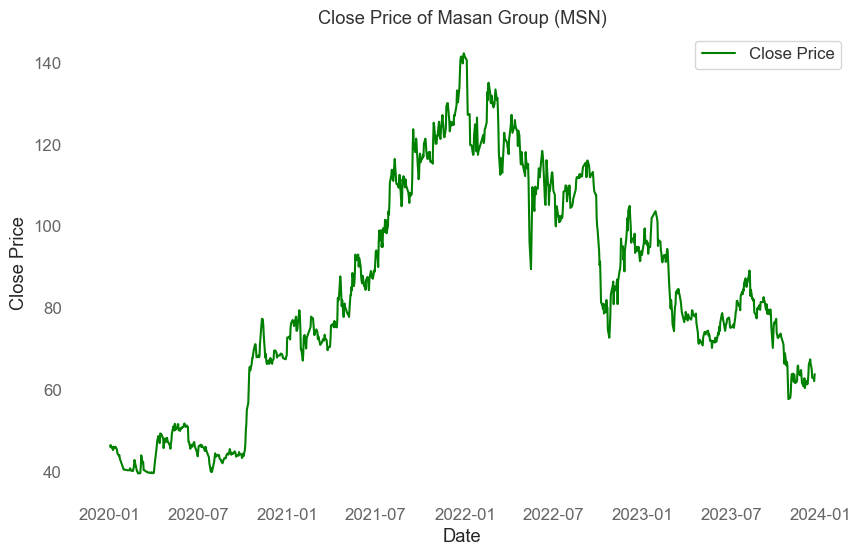

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Dataset/DNSE_Dataset_OHLC_daily.csv')
data['Date'] = pd.to_datetime(data['Date'])
import matplotlib.patches as mpatches
# Process Data Date
data = data[data['Date']>='2020-01-01']
data = data[data['Date']<='2023-12-20']
data_MSN = data[data['Symbol']=='MSN']
# Plot the close price of MSN with title legend and color
plt.figure(figsize=(10, 6))
plt.plot(data_MSN['Date'], data_MSN['Close'], label='Close Price', color='Green')
plt.title('Close Price of Masan Group (MSN)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()

**Result on VNINDEX Symbols**

In [61]:
data_VNI = data[data['Symbol']=='VNINDEX']
# Trading Rules
data_VNI = data_VNI.copy()
data_VNI['Trading'] = np.where(backtesting_data['Regime'] == 2, -1,
                                np.where(backtesting_data['Regime']== 0, 1,
                                        np.where((backtesting_data['Regime']==1), 0,
                                                np.nan)))  # or another default value as needed
pf = vbt.Portfolio.from_orders(data_VNI['Close'], size = data_VNI['Trading'] ,init_cash=10000, freq='d')
print('Lợi nhuận nhận được sau khi trading ',pf.total_profit())
pf.plot().show()


Lợi nhuận nhận được sau khi trading  2447.739999999976


In [62]:
pf.stats()

Start                                            3147262
End                                              3319660
Period                                 150 days 00:00:00
Start Value                                      10000.0
End Value                                       12447.74
Total Return [%]                                 24.4774
Benchmark Return [%]                            4.779347
Max Gross Exposure [%]                        537.255472
Total Fees Paid                                      0.0
Max Drawdown [%]                               45.671576
Max Drawdown Duration                   67 days 00:00:00
Total Trades                                          35
Total Closed Trades                                   34
Total Open Trades                                      1
Open Trade PnL                                 1460.1555
Win Rate [%]                                   67.647059
Best Trade [%]                                 12.335983
Worst Trade [%]                